In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain

list_of_lists = [[x, 0] for x in range(1000)]
n_lol = np.array(list_of_lists)

In [3]:
case1 = %timeit -o sum(list_of_lists, [])

case2 = %timeit -o list(chain(*list_of_lists))

case3 = %timeit -o list(chain.from_iterable(list_of_lists))

case4 = %timeit -o [y for x in list_of_lists for y in x]

case5 = %timeit -o n_lol.reshape(-1)

case6 = %timeit -o n_lol.flatten()

100 loops, best of 3: 2.16 ms per loop
10000 loops, best of 3: 55.8 µs per loop
10000 loops, best of 3: 50.9 µs per loop
10000 loops, best of 3: 78.8 µs per loop
The slowest run took 10.28 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 782 ns per loop
The slowest run took 18.46 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 720 ns per loop


In [13]:
l = [[x, 0] for x in range(1000)]

%timeit n = np.array(([x, 0] for x in range(1000)));n.flatten()

%timeit n = np.array(l);n.flatten()

n = np.array(l)
%timeit n.flatten()

The slowest run took 7.47 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.81 µs per loop
1000 loops, best of 3: 242 µs per loop
The slowest run took 23.00 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 712 ns per loop


In [4]:
%timeit l = [[x, 0] for x in range(1000)];list(chain(*l))

10000 loops, best of 3: 168 µs per loop


In [146]:
results = [case1.best, case2.best, case3.best, case4.best, case5.best, case6.best]

results

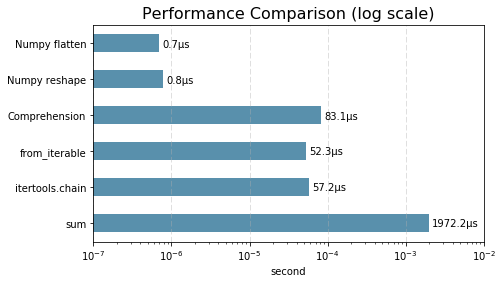

In [201]:
fig, ax = plt.subplots() 
fig.set_figwidth(7)
fig.set_figheight(4)
labels = ["sum", "itertools.chain", "from_iterable", "Comprehension", "Numpy reshape", "Numpy flatten"]
for i in range(len(results)):
    ax.barh(i, results[i], height=0.5, label=labels[i], color="#5990ac")

for i, v in enumerate(results):
    ax.text(v+v/10, i-0.1, "{:0.1f}μs".format(v*1000000))

plt.xlabel("second")
plt.xlim([10e-8, 10e-3])
plt.xscale('log')
plt.yticks(range(len(labels)), labels)
plt.grid(True, axis="x", linestyle="--", alpha=0.5)
plt.title("Performance Comparison (log scale)", fontsize=16)
plt.show();